## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load and examine the data
We'll work with a (synthetic) dataset of insurance charges, to see if we can understand why some customers pay more than others.

![Insurance Data](https://i.imgur.com/1nmy2YO.png)

In [2]:
# Path of the file to read
insurance_filepath = "data/insurance.csv"

# Read the file into a variable insurance_data
df = pd.read_csv(insurance_filepath)

As always, we check that the dataset loaded properly by printing the first five rows.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Scatter plots
To create a simple scatter plot, we use the sns.scatterplot command and specify the values for:

- the horizontal x-axis __(x=insurance_data['bmi'])__, and
- the vertical y-axis __(y=insurance_data['charges'])__.

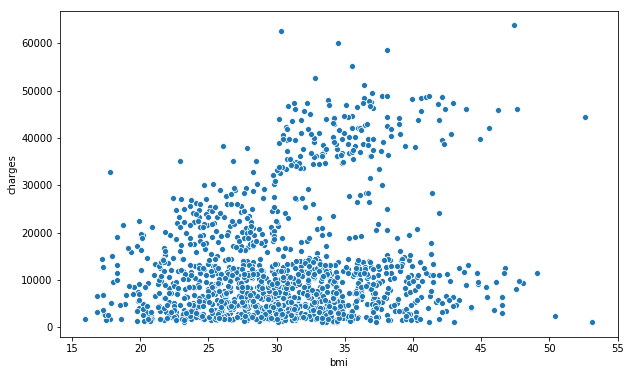

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'])

The scatterplot above suggests that body mass index (BMI) and insurance charges are positively correlated, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

## Regression plot
The ***regplot*** function produces a scatter plot and a regression line for it.

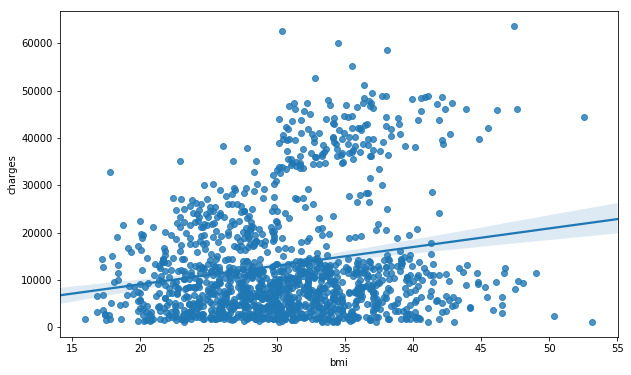

In [5]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['bmi'], y=df['charges'])

## Color-coded scatter plots for multiple variables
We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by *'smoker'*, and plot the other two columns (*'bmi'*, *'charges'*) on the axes.

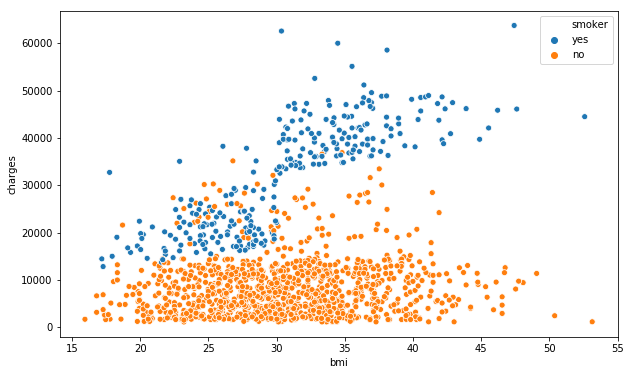

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. (*Note that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!*)

### Note:
> Notice that we manually set the figure size as 2/10 using ***plt.figure()*** fot the plot below. So the figure should be tall rather than wide.

However, ***sns.lmplot()** doesn't seem to respect the usual figure properties of **Matplotlib.pylot (plt)**. I searched various websites and others have also experienced this issue. It seems ***lmplot()*** works a little differently than the other **Seaborn** visualization functions.

<Figure size 144x720 with 0 Axes>

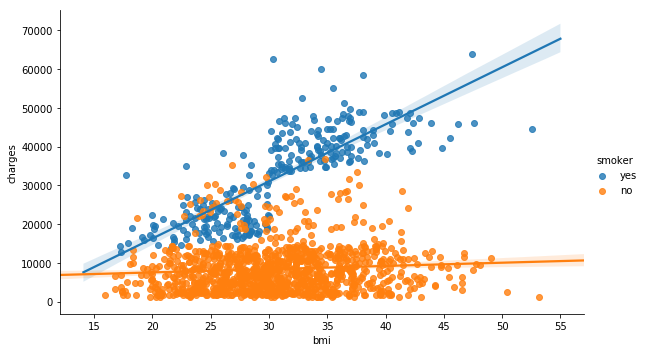

In [7]:
plt.figure(figsize=(2, 10)) # Aspect ratio set to 2/10 but ignored by lmplot
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker', aspect=10/6) # Aspect ratio 10/6

The sns.lmplot command above works slightly differently than the commands you have learned about so far:

- We specify the dataset with data=insurance_data.
- Instead of setting **x=insurance_data['bmi']** to select the *'bmi'* column in insurance_data, we set **x="bmi"** to specify the name of the column only.
- Similarly, **y="charges"** and **hue="smoker"** also contain the names of columns.

## Swarm plots
Usually, we use scatter plots to highlight the relationship between two continuous variables (like *"bmi"* and *"charges"*). However, we can adapt the design of the scatter plot to feature a categorical variable (like *"smoker"*) on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the ***sns.swarmplot*** function.

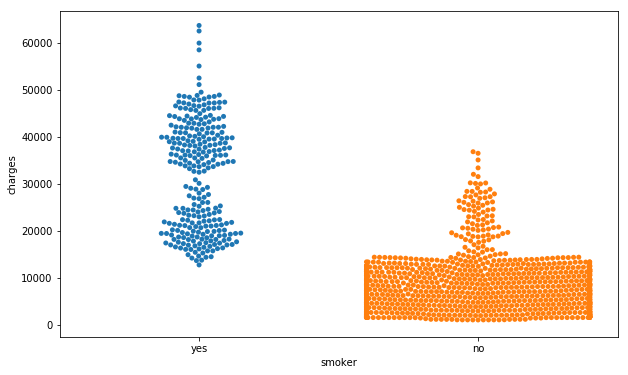

In [8]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df['smoker'], y=df['charges'])

Among other things, this plot shows us that:

- on average, non-smokers are charged less than smokers, and
- the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.